In [1]:
import nltk
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split
import contractions
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer, WordNetLemmatizer
from bs4 import BeautifulSoup
from contractions import contractions_dict

In [2]:
# from nltk.stem import WordNetLemmatizer
# from nltk.tokenize import word_tokenize

nltk.download('punkt')  # Download punkt tokenizer
nltk.download('wordnet')  # Download WordNet corpus
# Download NLTK stopwords
nltk.download('stopwords')
nltk.download('averaged_perceptron_tagger') 

[nltk_data] Downloading package punkt to /home/irteam/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/irteam/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/irteam/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/irteam/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True

In [3]:
# Load and preprocess the dataset
tr_dataset = pd.read_csv("/home/irteam/minhah-dcloud-dir/minhah/dreaddit/dreaddit-train.csv")

In [4]:
print(tr_dataset)

             subreddit post_id sentence_range  \
0                 ptsd  8601tu       (15, 20)   
1           assistance  8lbrx9         (0, 5)   
2                 ptsd  9ch1zh       (15, 20)   
3        relationships  7rorpp        [5, 10]   
4     survivorsofabuse  9p2gbc         [0, 5]   
...                ...     ...            ...   
2833     relationships  7oee1t       [35, 40]   
2834              ptsd  9p4ung       [20, 25]   
2835           anxiety  9nam6l        (5, 10)   
2836    almosthomeless  5y53ya        [5, 10]   
2837              ptsd  5y25cl         [0, 5]   

                                                   text     id  label  \
0     He said he had not felt that way before, sugge...  33181      1   
1     Hey there r/assistance, Not sure if this is th...   2606      0   
2     My mom then hit me with the newspaper and it s...  38816      1   
3     until i met my new boyfriend, he is amazing, h...    239      1   
4     October is Domestic Violence Awareness M

In [5]:
def preprocess_text(text):
    # Lowercasing
    text = text.lower()

    # Removing URLs
    text = re.sub(r'http\S+', '', text)

    # Removing HTML tags
    text = BeautifulSoup(text, 'html.parser').get_text()

    # Expanding contractions
    text = ' '.join([contractions_dict.get(word, word) for word in text.split()])

    # Removing punctuation
    text = re.sub(r'[^\w\s]', '', text)

    # Removing digits
    text = re.sub(r'\d', '', text)

    # Tokenization and removing stop words
    stop_words = set(stopwords.words('english'))
    tokens = word_tokenize(text)
    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]

    # Stemming and lemmatization
    stemmer = PorterStemmer()
    lemmatizer = WordNetLemmatizer()
    tokens = [stemmer.stem(lemmatizer.lemmatize(word)) for word in tokens]

    # Removing extra spaces and emojis
    text = ' '.join(tokens)
    text = re.sub(r'\s+', ' ', text).strip()
    text = re.sub(r'[^\x00-\x7F]+', '', text)

    return text

In [6]:
tr_dataset['preprocessed_text'] = tr_dataset['text'].apply(preprocess_text)

In [7]:
tr_dataset['text'][0], tr_dataset['preprocessed_text'][0]

('He said he had not felt that way before, suggeted I go rest and so ..TRIGGER AHEAD IF YOUI\'RE A HYPOCONDRIAC LIKE ME: i decide to look up "feelings of doom" in hopes of maybe getting sucked into some rabbit hole of ludicrous conspiracy, a stupid "are you psychic" test or new age b.s., something I could even laugh at down the road. No, I ended up reading that this sense of doom can be indicative of various health ailments; one of which I am prone to.. So on top of my "doom" to my gloom..I am now f\'n worried about my heart. I do happen to have a physical in 48 hours.',
 'said felt way sugget go rest trigger ahead youir hypocondriac like decid look feel doom hope mayb get suck rabbit hole ludicr conspiraci stupid psychic test new age b someth could even laugh road end read sens doom indic variou health ailment one prone top doom gloomi fn worri heart happen physic hour')

In [8]:
tr_dataset['text'][1], tr_dataset['preprocessed_text'][1]

("Hey there r/assistance, Not sure if this is the right place to post this.. but here goes =) I'm currently a student intern at Sandia National Labs and working on a survey to help improve our marketing outreach efforts at the many schools we recruit at around the country. We're looking for current undergrad/grad STEM students so if you're a STEM student or know STEM students, I would greatly appreciate if you can help take or pass along this short survey. As a thank you, everyone who helps take the survey will be entered in to a drawing for chance to win one of three $50 Amazon gcs.",
 'hey rassist sure right place post go im current student intern sandia nation lab work survey help improv market outreach effort mani school recruit around countri look current undergradgrad stem student stem student know stem student would greatli appreci help take pa along short survey thank everyon help take survey enter draw chanc win one three amazon gc')

In [9]:
tr_dataset['text'][2], tr_dataset['preprocessed_text'][2]

('My mom then hit me with the newspaper and it shocked me that she would do this, she knows I don\'t like play hitting, smacking, striking, hitting or violence of any sort on my person. Do I send out this vibe asking for it from the universe? Then yesterday I decided to take my friend to go help another "friend" move to a new place. While we were driving the friend we are moving strikes me on my shoulder. And I address it immediately because this is the 4th time I have told him not to do these things, then my other friend who is driving nearly gets into an collision with another car i think because he was high on marijuana and the friend we are moving in the backseat is like "you have to understand I was just trying to get your attention" you know the thing 5 year olds do to get peoples attention by smacking them, this guy is in his 60\'s.',
 'mom hit newspap shock would know like play hit smack strike hit violenc sort person send vibe ask univers yesterday decid take friend go help an

In [10]:
dftemp= tr_dataset.copy()
dftemp['text']= tr_dataset['preprocessed_text']
dftemp

,subreddit,post_id,sentence_range,text,id,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,preprocessed_text
0,ptsd,8601tu,"(15, 20)",said felt way sugget go rest trigger ahead you...,33181,1,0.800000,1521614353,5,1.806818,...,1.1250,1.0,1.77000,1.52211,1.89556,0.86,1,3.253573,-0.002742,said felt way sugget go rest trigger ahead you...
1,assistance,8lbrx9,"(0, 5)",hey rassist sure right place post go im curren...,2606,0,1.000000,1527009817,4,9.429737,...,1.0000,1.0,1.69586,1.62045,1.88919,0.65,2,8.828316,0.292857,hey rassist sure right place post go im curren...
2,ptsd,9ch1zh,"(15, 20)",mom hit newspap shock would know like play hit...,38816,1,0.800000,1535935605,2,7.769821,...,1.1429,1.0,1.83088,1.58108,1.85828,0.67,0,7.841667,0.011894,mom hit newspap shock would know like play hit...
3,relationships,7rorpp,"[5, 10]",met new boyfriend amaz kind sweet good student...,239,1,0.600000,1516429555,0,2.667798,...,1.1250,1.0,1.75356,1.52114,1.98848,0.50,5,4.104027,0.141671,met new boyfriend amaz kind sweet good student...
4,survivorsofabuse,9p2gbc,"[0, 5]",octob domest violenc awar month domest violenc...,1421,1,0.800000,1539809005,24,7.554238,...,1.1250,1.0,1.77644,1.64872,1.81456,1.00,1,7.910952,-0.204167,octob domest violenc awar month domest violenc...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2833,relationships,7oee1t,"[35, 40]",week ago preciou ignor jan happi year preciou ...,1713,0,1.000000,1515187044,13,-1.369333,...,1.0000,1.0,1.71133,1.45301,2.00304,0.84,16,0.254444,0.552066,week ago preciou ignor jan happi year preciou ...
2834,ptsd,9p4ung,"[20, 25]",abil cope anymor im tri lot thing trigger im s...,1133,1,1.000000,1539827412,33,9.425478,...,1.0000,1.0,1.65003,1.56842,1.81527,0.96,6,8.640664,-0.220370,abil cope anymor im tri lot thing trigger im s...
2835,anxiety,9nam6l,"(5, 10)",case first time read post look peopl will comp...,10442,0,1.000000,1539269312,2,11.060675,...,1.1250,1.0,1.79768,1.49074,1.92286,1.00,1,9.951524,0.045455,case first time read post look peopl will comp...
2836,almosthomeless,5y53ya,"[5, 10]",find normal good relationship main problem see...,1834,0,0.571429,1488938143,4,2.421912,...,1.1429,1.0,1.71642,1.57627,1.89972,0.75,7,4.036765,0.159722,find normal good relationship main problem see...


In [11]:
# Split dataset into train, validation, and test sets
train_data, val_data = train_test_split(dftemp, test_size=0.2, random_state=42)

In [12]:
from torch.utils.data import Dataset
import numpy as np
import re
import nltk
import string
texts_all=[]
weights_all=[]
class D_Dataset(Dataset):
    def __init__(self, dataframe, tokenizer):
        texts = dataframe.text.values.tolist()

        self.texts = [tokenizer(text, padding='max_length',
                                max_length=512,
                                truncation=True,
                                return_tensors="pt")
                      for text in texts]
        if 'label' in dataframe:
            classes = dataframe.label.values.tolist()
            self.labels = classes
    
    def __len__(self):
        return len(self.texts)

    def __getitem__(self, idx):
        text = self.texts[idx]

        label = -1
        if hasattr(self, 'labels'):
            label = self.labels[idx]

        return text, label

In [13]:
from torch import nn

class Classifier(nn.Module):
    def __init__(self, base_model):
        super(Classifier, self).__init__()

        self.bert = base_model
        self.fc1 = nn.Linear(768, 32)
        self.fc2 = nn.Linear(32, 1)

        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        
    def forward(self, input_ids, attention_mask):
        bert_out = self.bert(input_ids=input_ids,
                             attention_mask=attention_mask)[0][:, 0]
        x = self.fc1(bert_out)
        x = self.relu(x)
        
        x = self.fc2(x)
        x = self.sigmoid(x)

        return x

In [14]:
import torch
from torch.optim import Adam
from tqdm import tqdm

def train(model, train_dataloader, val_dataloader, learning_rate, epochs):
    best_val_loss = float('inf')
    early_stopping_threshold_count = 0
    
    
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:1" if use_cuda else "cpu")

    criterion = nn.BCELoss()
    optimizer = Adam(model.parameters(), lr=learning_rate)

    model = model.to(device)
    criterion = criterion.to(device)
    tr_loss=[]
    tr_acc=[]
    t_loss=[]
    t_acc=[]

    for epoch in range(epochs):
        total_acc_train = 0
        total_loss_train = 0
        
        model.train()
        
        for train_input, train_label in tqdm(train_dataloader):
            attention_mask = train_input['attention_mask'].to(device)
            input_ids = train_input['input_ids'].squeeze(1).to(device)

            train_label = train_label.to(device)

            output = model(input_ids, attention_mask)

            loss = criterion(output, train_label.float().unsqueeze(1))

            total_loss_train += loss.item()

            acc = ((output >= 0.5).int() == train_label.unsqueeze(1)).sum().item()
            total_acc_train += acc

            loss.backward()
            optimizer.step()
            optimizer.zero_grad()

        with torch.no_grad():
            total_acc_val = 0
            total_loss_val = 0
            
            model.eval()
            
            for val_input, val_label in tqdm(val_dataloader):
                attention_mask = val_input['attention_mask'].to(device)
                input_ids = val_input['input_ids'].squeeze(1).to(device)

                val_label = val_label.to(device)

                output = model(input_ids, attention_mask)

                loss = criterion(output, val_label.float().unsqueeze(1))

                total_loss_val += loss.item()

                acc = ((output >= 0.5).int() == val_label.unsqueeze(1)).sum().item()
                total_acc_val += acc
            
            print(f'Epochs: {epoch + 1} '
                  f'| Train Loss: {total_loss_train / len(train_dataloader): .3f} '
                  f'| Train Accuracy: {total_acc_train / (len(train_dataloader.dataset)): .3f} '
                  f'| Val Loss: {total_loss_val / len(val_dataloader): .3f} '
                  f'| Val Accuracy: {total_acc_val / len(val_dataloader.dataset): .3f}')
            tr_loss.append(total_loss_train / len(train_dataloader))
            tr_acc.append(total_acc_train / (len(train_dataloader.dataset)))
            t_loss.append(total_loss_val / len(val_dataloader))
            t_acc.append(total_acc_val / len(val_dataloader.dataset))
            
            if best_val_loss > total_loss_val:
                best_val_loss = total_loss_val
                torch.save(model, f"roberta_model_dreaddit_best_preprocessed.pt")
                print("Saved model")
                early_stopping_threshold_count = 0
            else:
                early_stopping_threshold_count += 1
                
            if early_stopping_threshold_count >= 1:
                print("Early stopping")
                break
    return tr_loss, t_loss, tr_acc, t_acc

In [15]:
from transformers import AutoTokenizer, AutoModel
from torch.utils.data import DataLoader

torch.manual_seed(0)
np.random.seed(0)
    
    
BERT_MODEL = "roberta-base"
tokenizer = AutoTokenizer.from_pretrained(BERT_MODEL)
base_model = AutoModel.from_pretrained(BERT_MODEL)

train_dataloader = DataLoader(D_Dataset(train_data, tokenizer), batch_size=8, shuffle=True, num_workers=0)
val_dataloader = DataLoader(D_Dataset(val_data, tokenizer), batch_size=8, num_workers=0)

model = Classifier(base_model)


learning_rate = 1e-6
epochs = 30
train_loss_values, val_loss_values, train_accuracy_values, val_accuracy_values= train(model, train_dataloader, val_dataloader, learning_rate, epochs)

Some weights of the model checkpoint at roberta-base were not used when initializing RobertaModel: ['lm_head.dense.bias', 'lm_head.bias', 'lm_head.dense.weight', 'lm_head.layer_norm.bias', 'lm_head.layer_norm.weight']
- This IS expected if you are initializing RobertaModel from the checkpoint of a model trained on another task or with another architecture (e.g. initializing a BertForSequenceClassification model from a BertForPreTraining model).
- This IS NOT expected if you are initializing RobertaModel from the checkpoint of a model that you expect to be exactly identical (initializing a BertForSequenceClassification model from a BertForSequenceClassification model).
Some weights of RobertaModel were not initialized from the model checkpoint at roberta-base and are newly initialized: ['roberta.pooler.dense.weight', 'roberta.pooler.dense.bias']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
100%|██████████| 71/71 [00:06<00

Epochs: 1 | Train Loss:  0.686 | Train Accuracy:  0.539 | Val Loss:  0.639 | Val Accuracy:  0.650
Saved model


100%|██████████| 71/71 [00:06<00:00, 10.89it/s]


Epochs: 2 | Train Loss:  0.587 | Train Accuracy:  0.709 | Val Loss:  0.570 | Val Accuracy:  0.725
Saved model


100%|██████████| 71/71 [00:06<00:00, 10.88it/s]


Epochs: 3 | Train Loss:  0.519 | Train Accuracy:  0.761 | Val Loss:  0.568 | Val Accuracy:  0.727
Saved model


100%|██████████| 71/71 [00:06<00:00, 10.87it/s]

Epochs: 4 | Train Loss:  0.489 | Train Accuracy:  0.774 | Val Loss:  0.573 | Val Accuracy:  0.708
Early stopping


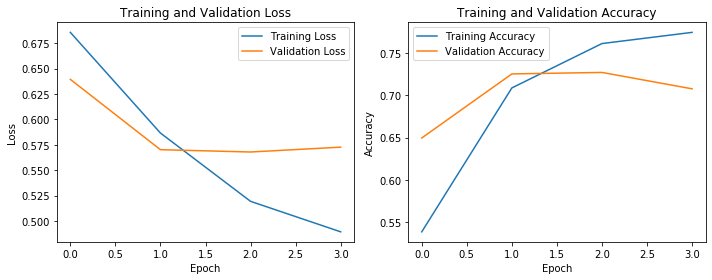

In [16]:
# Plotting learning curves
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.plot(train_loss_values, label='Training Loss')
plt.plot(val_loss_values, label='Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(train_accuracy_values, label='Training Accuracy')
plt.plot(val_accuracy_values, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Validation Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

In [17]:
def get_text_predictions(model, loader):
    use_cuda = torch.cuda.is_available()
    device = torch.device("cuda:1" if use_cuda else "cpu")

    model = model.to(device)
    
    
    results_predictions = []
    with torch.no_grad():
        model.eval()
        for data_input, _ in tqdm(loader):
            attention_mask = data_input['attention_mask'].to(device)
            input_ids = data_input['input_ids'].squeeze(1).to(device)


            output = model(input_ids, attention_mask)
            
            output = (output > 0.5).int()
            results_predictions.append(output)
    
    return torch.cat(results_predictions).cpu().detach().numpy()

In [18]:
model = torch.load("roberta_model_dreaddit_best_preprocessed.pt")

In [19]:
# Load and preprocess the dataset
test_df = pd.read_csv("/home/irteam/minhah-dcloud-dir/minhah/dreaddit/dreaddit-test.csv")

In [20]:
test_df['preprocessed_text'] = test_df['text'].apply(preprocess_text)

In [21]:
testdf_temp=test_df.copy()
testdf_temp['text']= testdf_temp['preprocessed_text']

In [22]:
print(testdf_temp)

        id      subreddit post_id sentence_range  \
0      896  relationships  7nu7as       [50, 55]   
1    19059        anxiety  680i6d        (5, 10)   
2     7977           ptsd  8eeu1t        (5, 10)   
3     1214           ptsd  8d28vu         [2, 7]   
4     1965  relationships  7r1e85       [23, 28]   
..     ...            ...     ...            ...   
710  24271           ptsd  7vavh4         (0, 5)   
711   2212  relationships  7oeyuc       [70, 75]   
712  27951  relationships  7ssxec       (35, 40)   
713   1164     assistance  90bila        [8, 13]   
714   1519     assistance  7uueuc        [5, 10]   

                                                  text  label  confidence  \
0    like want problem take longer ask friend help ...      0    0.800000   
1    man front desk titl hr custom servic repres jo...      0    1.000000   
2    would save much money new housrit expens citi ...      1    1.000000   
3    ex use shoot back want go time matter almost w...      1    0.

In [23]:
test_dataloader = DataLoader(D_Dataset(testdf_temp, tokenizer), batch_size=8, shuffle=False, num_workers=0)

In [24]:
sample_submission = pd.read_csv("/home/irteam/minhah-dcloud-dir/minhah/dreaddit/dreaddit-test.csv")

In [25]:
sample_submission["prediction"] = get_text_predictions(model, test_dataloader)

100%|██████████| 90/90 [00:08<00:00, 11.05it/s]


In [26]:
# display(sample_submission.head(20))

In [27]:
sample_submission.head(20)

,id,subreddit,post_id,sentence_range,text,label,confidence,social_timestamp,social_karma,syntax_ari,...,lex_dal_min_activation,lex_dal_min_imagery,lex_dal_avg_activation,lex_dal_avg_imagery,lex_dal_avg_pleasantness,social_upvote_ratio,social_num_comments,syntax_fk_grade,sentiment,prediction
0,896,relationships,7nu7as,"[50, 55]","Its like that, if you want or not.“ ME: I have...",0,0.8,1.514981e+09,22,-1.238793,...,1.2000,1.0,1.65864,1.32245,1.80264,0.63,62,-0.148707,0.000000,1
1,19059,anxiety,680i6d,"(5, 10)",I man the front desk and my title is HR Custom...,0,1.0,1.493348e+09,5,7.684583,...,1.1250,1.0,1.69133,1.69180,1.97249,1.00,2,7.398222,-0.065909,0
2,7977,ptsd,8eeu1t,"(5, 10)",We'd be saving so much money with this new hou...,1,1.0,1.524517e+09,10,2.360408,...,1.0000,1.0,1.70974,1.52985,1.86108,1.00,8,3.149288,-0.036818,1
3,1214,ptsd,8d28vu,"[2, 7]","My ex used to shoot back with ""Do you want me ...",1,0.5,1.524018e+09,5,5.997000,...,1.3000,1.0,1.72615,1.52000,1.84909,1.00,7,6.606000,-0.066667,0
4,1965,relationships,7r1e85,"[23, 28]",I haven’t said anything to him yet because I’m...,0,0.8,1.516200e+09,138,4.649418,...,1.1429,1.0,1.75642,1.43582,1.91725,0.84,70,4.801869,0.141667,0
5,850,assistance,7py440,"[10, 15]",Thanks. Edit 1 - Fuel Receipt As Requested. <u...,0,1.0,1.515778e+09,7,0.910714,...,1.0000,1.0,1.70441,1.56364,1.76971,0.70,16,3.289524,-0.275000,0
6,1643,homeless,9e8zyg,"[10, 15]","When moving into their tiny house, they would ...",0,0.0,1.536453e+09,14,15.815576,...,1.0000,1.0,1.59863,1.41860,1.82149,0.82,15,13.097570,0.000000,0
7,39090,anxiety,71ma4y,"(0, 5)","More specifically, for example, I live with ro...",1,0.8,1.506028e+09,6,10.029951,...,1.1429,1.0,1.70439,1.50598,1.82334,0.88,6,9.593832,0.039977,1
8,19468,almosthomeless,6d5p34,"(0, 5)",Long story short my family in NE Ohio is abusi...,1,1.0,1.495666e+09,21,1.068692,...,1.0000,1.0,1.69207,1.62817,1.88011,0.81,30,3.251153,0.082407,1
9,48595,domesticviolence,83d7jt,"(5, 10)","This new ""roommate"" lived 3 hours away in an p...",0,0.6,1.520659e+09,7,5.789629,...,1.0000,1.0,1.70685,1.73571,1.88339,1.00,7,5.975440,0.258965,0


In [28]:
sample_submission.to_csv("/home/irteam/minhah-dcloud-dir/minhah/dreaddit/dreaddit-test-roberta-preprocessed.csv", index=False)

In [32]:
import pandas as pd
sample_submission = pd.read_csv("/home/irteam/minhah-dcloud-dir/minhah/dreaddit/dreaddit-test-roberta-preprocessed.csv")

In [33]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix
# Print classification report
class_names = ['Not Stressed','Stressed']
classification_rep = classification_report(sample_submission['label'],sample_submission['prediction'], target_names=class_names)
print("Classification Report:")
print(classification_rep)


Classification Report:
              precision    recall  f1-score   support

Not Stressed       0.78      0.64      0.70       346
    Stressed       0.71      0.83      0.77       369

    accuracy                           0.74       715
   macro avg       0.75      0.74      0.74       715
weighted avg       0.75      0.74      0.74       715



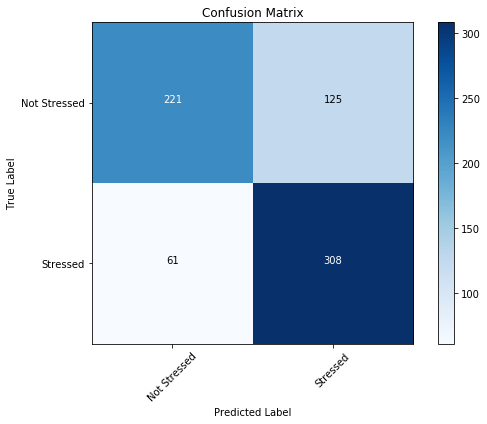

In [34]:
import matplotlib.pyplot as plt
import numpy as np
# Compute confusion matrix
cm = confusion_matrix(sample_submission['label'],sample_submission['prediction'])

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names, rotation=45)
plt.yticks(tick_marks, class_names)

# Add count values to the plot
thresh = cm.max() / 2.0  # Threshold for color change
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.tight_layout()
plt.show()
